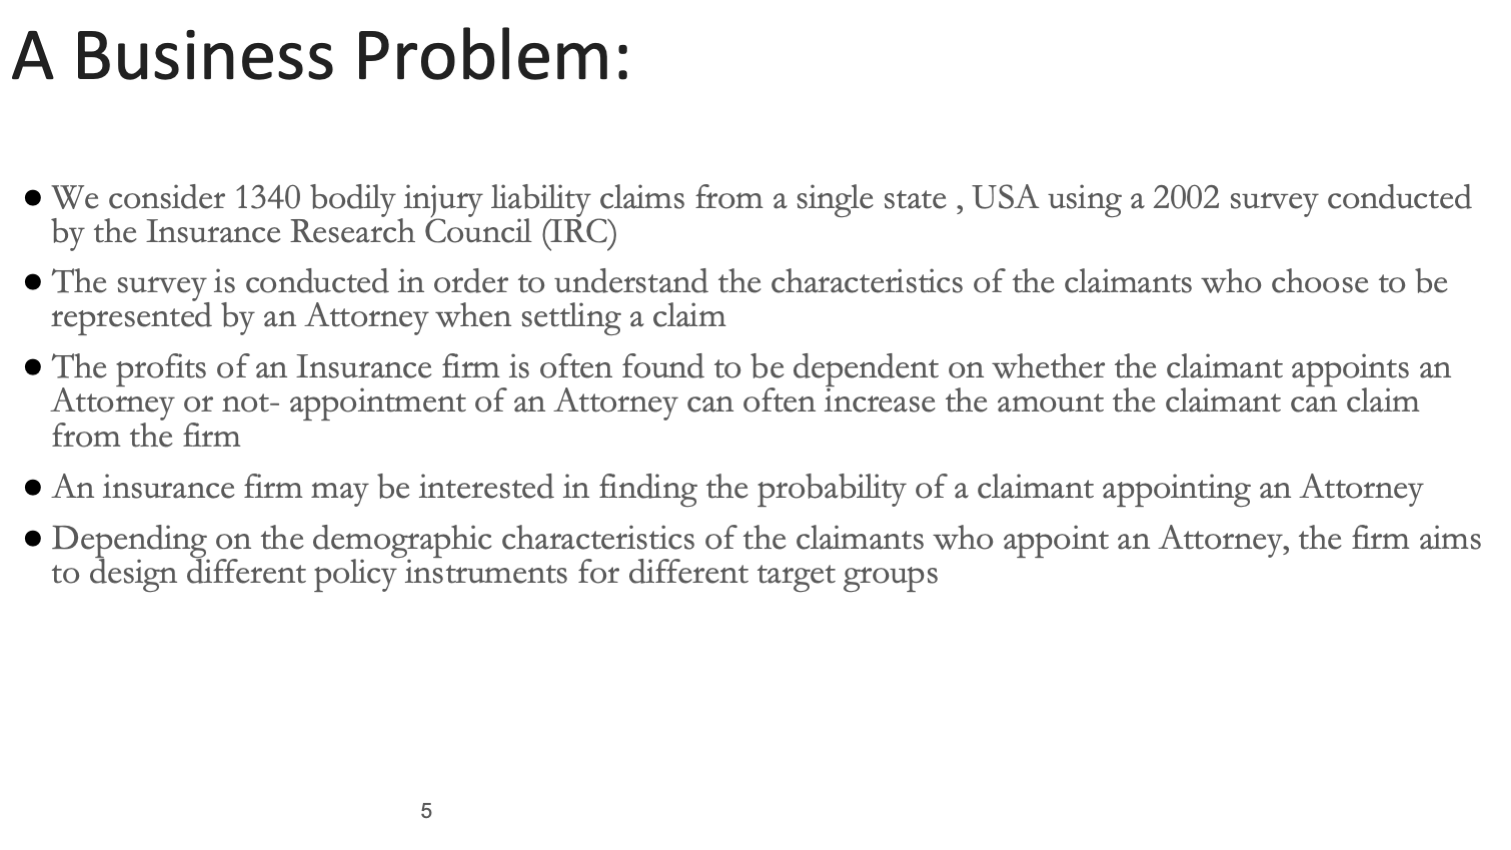

## Load the Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset

In [2]:
# Dataset/claimants.csv
df = pd.read_csv('Dataset/claimants.csv')
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


## Duplicates

In [3]:
# check for duplicate records
df.duplicated().sum()

0

## Delete unwanted features

In [4]:
# delete CASENUM column
df.drop('CASENUM', axis=1, inplace=True)
df.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


## Shape

In [5]:
# shape of the data
df.shape

(1340, 6)

## Missing Value Check

In [6]:
# check for missing values
df.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

## Missing Value Treatment

In [7]:
# check shape of dataset if na values are dropped
df.dropna().shape

(1096, 6)

In [8]:
# drop observations with NA values
df = df.dropna()
df.shape

(1096, 6)

In [9]:
df.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

## Do EDA here

## Seggregate Target Feature from Independent Features

In [10]:
# separate the target feature from the independent features
X = df.drop('ATTORNEY',axis=1)
y = df['ATTORNEY']

## Split Data into Train and Test sets

In [11]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

## Instantiate and train a Logistic Regression Model

In [12]:
# create a logistic regression model and fit the model on the training data
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [13]:
log_reg.coef_

array([[ 0.40131585,  0.54554594, -0.78114554,  0.01003038, -0.39685852]])

In [14]:
log_reg.intercept_

array([-0.20480482])

## Model Prediction on Train & Test Data

In [15]:
# get the prediction of the model on the training and test data
pred_train = log_reg.predict(X_train)
pred_test = log_reg.predict(X_test)

In [16]:
pred_train[:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [17]:
pred_test[:10]

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [19]:
log_reg.predict_proba(X_test).round(2)

array([[1.  , 0.  ],
       [0.38, 0.62],
       [0.6 , 0.4 ],
       [0.38, 0.62],
       [0.47, 0.53],
       [0.74, 0.26],
       [0.53, 0.47],
       [0.52, 0.48],
       [0.69, 0.31],
       [0.71, 0.29],
       [0.4 , 0.6 ],
       [0.73, 0.27],
       [0.3 , 0.7 ],
       [0.42, 0.58],
       [0.84, 0.16],
       [1.  , 0.  ],
       [0.97, 0.03],
       [0.39, 0.61],
       [0.74, 0.26],
       [0.31, 0.69],
       [0.36, 0.64],
       [0.37, 0.63],
       [0.29, 0.71],
       [0.34, 0.66],
       [0.38, 0.62],
       [0.31, 0.69],
       [1.  , 0.  ],
       [0.73, 0.27],
       [0.45, 0.55],
       [0.75, 0.25],
       [0.86, 0.14],
       [0.28, 0.72],
       [0.6 , 0.4 ],
       [0.82, 0.18],
       [0.77, 0.23],
       [0.49, 0.51],
       [0.35, 0.65],
       [0.8 , 0.2 ],
       [0.26, 0.74],
       [0.84, 0.16],
       [0.34, 0.66],
       [0.77, 0.23],
       [0.7 , 0.3 ],
       [0.39, 0.61],
       [0.62, 0.38],
       [0.41, 0.59],
       [0.43, 0.57],
       [0.46,

## Evaluate Model Prediction Performance - Train Data

In [20]:
df['ATTORNEY'].value_counts(normalize=True)

0    0.527372
1    0.472628
Name: ATTORNEY, dtype: float64

In [23]:
# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

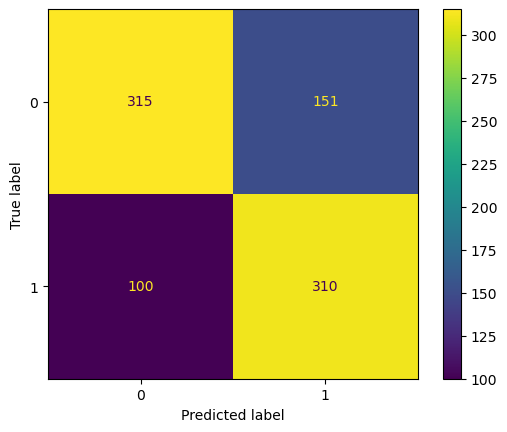

In [22]:
ConfusionMatrixDisplay.from_predictions(y_train, pred_train);

In [25]:
# classification report
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       466
           1       0.67      0.76      0.71       410

    accuracy                           0.71       876
   macro avg       0.72      0.72      0.71       876
weighted avg       0.72      0.71      0.71       876



In [26]:
# roc curve with diagonal line and auc score
from sklearn.metrics import RocCurveDisplay

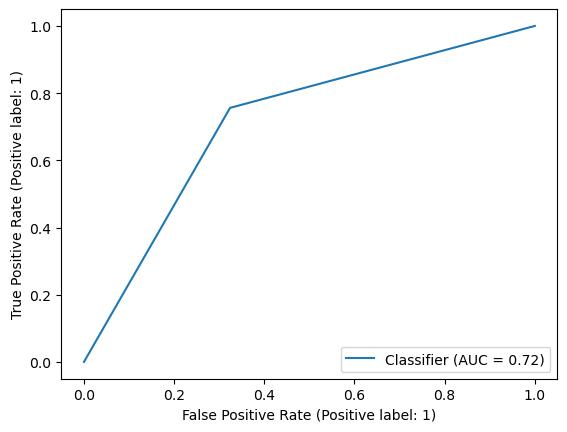

In [27]:
RocCurveDisplay.from_predictions(y_train,pred_train);

## Evaluate Model Prediction Performance - Test Data

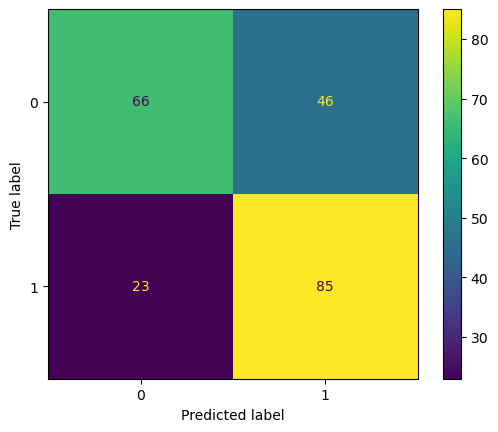

In [28]:
# confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test,pred_test);

In [30]:
# classification report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.74      0.59      0.66       112
           1       0.65      0.79      0.71       108

    accuracy                           0.69       220
   macro avg       0.70      0.69      0.68       220
weighted avg       0.70      0.69      0.68       220



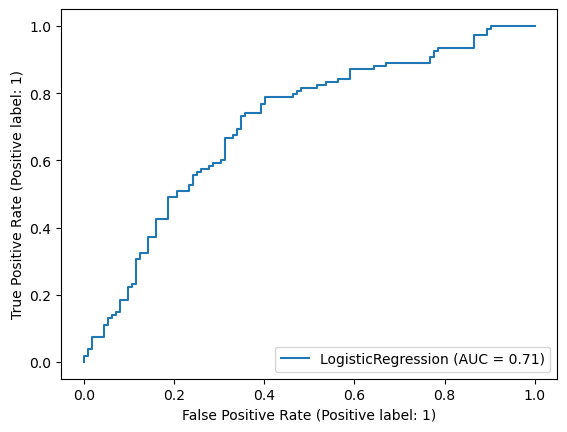

In [31]:
# ROC curve with diagonal line and auc score
RocCurveDisplay.from_estimator(log_reg,X_test,y_test);